In [128]:
import pickle
import pandas as pd
import sklearn
from sklearn.metrics import f1_score

In [190]:
# [((target, image), dist), ..., ()]
filename = 'torchreid_cosine_distance__saved_features_torchreid_datasets_1200_w40_solid_cropped_train__datasets_1200_w40_solid_images_select_cropped.pkl'
# filename = 'torchreid_cosine_distance__saved_features_torchreid_datasets_1200_w40_solid_cropped_train__saved_features_torchreid__datasets_1200_w40_solid_images_train_overfit.pkl'
with open(filename, 'rb') as f:
    distances = pickle.load(f)

In [191]:
len(distances)

130800

In [192]:
distances[0]

(('frankfurt_000001_057954_0', 'frankfurt_000001_057954_0'), 0.0885)

In [193]:
distances[-1]

(('erfurt_000050_000019_4', 'jena_000019_000019_0'), 0.6987)

### MATCHES

In [194]:
# [(target==image, dist), ..., ()]

matches = [(tup[0][0], tup[1]) for tup in distances if tup[0][0] == tup[0][1]]

In [195]:
len(matches)

109

In [196]:
print(matches[0])
print(matches[-1])

('frankfurt_000001_057954_0', 0.0885)
('bremen_000100_000019_9', 0.3843)


### IMAGES

In [197]:
images = [x[0] for x in matches]
print(images[0])

frankfurt_000001_057954_0


### MATCH RANK

In [198]:
distances_dict = {image:[] for image in images}
for pair in distances:
    distances_dict[pair[0][0]].append((pair[0][1], pair[1]))
    
# print(image_distances)

In [199]:
x = distances_dict['frankfurt_000001_057954_0']
# x

In [200]:
# k = sorted(x, key=lambda y: y[1], reverse=True)
# k

In [201]:
match_ranks = {}
for target in images:
    target_distances = sorted(distances_dict[target], key=lambda x: x[1], reverse=False) # confirm list is sorted (ascending)
    images_ranked = [img[0] for img in target_distances] # get list of image names in ascending order
    match_ranks[target] = images_ranked.index(target) # get rank of target-image match

In [202]:
match_ranks

{'frankfurt_000001_057954_0': 0,
 'frankfurt_000001_010600_1': 0,
 'aachen_000111_000019_19': 0,
 'jena_000000_000019_1': 0,
 'jena_000027_000019_7': 0,
 'bremen_000257_000019_3': 0,
 'bremen_000208_000019_4': 0,
 'aachen_000019_000019_14': 0,
 'frankfurt_000001_007857_2': 0,
 'bremen_000261_000019_1': 0,
 'frankfurt_000000_009969_5': 0,
 'frankfurt_000001_055387_5': 0,
 'hanover_000000_048379_5': 0,
 'hamburg_000000_096624_6': 0,
 'hamburg_000000_053563_35': 0,
 'dusseldorf_000078_000019_2': 0,
 'hanover_000000_028202_3': 0,
 'bremen_000287_000019_7': 0,
 'hanover_000000_013814_10': 0,
 'frankfurt_000001_028854_7': 0,
 'cologne_000129_000019_8': 0,
 'hamburg_000000_022524_3': 0,
 'bremen_000099_000019_9': 0,
 'hanover_000000_044344_1': 0,
 'dusseldorf_000045_000019_1': 0,
 'frankfurt_000000_022254_0': 0,
 'hanover_000000_013205_2': 0,
 'aachen_000048_000019_15': 0,
 'frankfurt_000001_055306_7': 0,
 'frankfurt_000001_007857_1': 0,
 'frankfurt_000000_011461_1': 0,
 'aachen_000100_000019

In [203]:
match_ranks_df = pd.DataFrame.from_dict(match_ranks, orient='index', columns=['rank'])
match_ranks_df

,rank
frankfurt_000001_057954_0,0
frankfurt_000001_010600_1,0
aachen_000111_000019_19,0
jena_000000_000019_1,0
jena_000027_000019_7,0
...,...
erfurt_000083_000019_3,26
aachen_000071_000019_16,57
aachen_000017_000019_12,8
aachen_000046_000019_1,73


In [204]:
match_ranks_df
#top 0
top_0_count = len(match_ranks_df[match_ranks_df['rank'] == 0])
print('top 0 count: ', top_0_count)
print('top 0 percent: ', round(top_0_count / len(images), 4))
print()
#top 5
top_5_count = len(match_ranks_df[match_ranks_df['rank'] < 5])
print('top 5 count: ', top_5_count)
print('top 5 percent: ', round(top_5_count / len(images), 4))
print()
#top 120
top_120_count = len(match_ranks_df[match_ranks_df['rank'] < 120])
print('top 120 count: ', top_120_count)
print('top 120 percent: ', round(top_120_count / len(images), 4))

top 0 count:  80
top 0 percent:  0.7339

top 5 count:  94
top 5 percent:  0.8624

top 120 count:  109
top 120 percent:  1.0


In [205]:
ranks = list(match_ranks.values())
ranks


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 6,
 0,
 4,
 0,
 20,
 0,
 3,
 0,
 0,
 4,
 5,
 1,
 1,
 5,
 5,
 4,
 14,
 3,
 2,
 1,
 3,
 7,
 4,
 70,
 0,
 25,
 26,
 57,
 8,
 73,
 71]

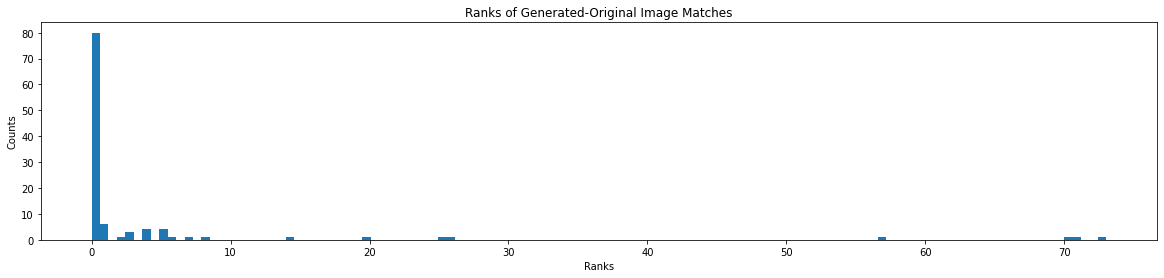

In [206]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)

num_bins = 120 #240 #1200

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(ranks, num_bins, density=False)

# ax.plot(bins, y, '--')
ax.set_xlabel('Ranks')
ax.set_ylabel('Counts')
ax.set_title('Ranks of Generated-Original Image Matches')
# .ylim(20)

# Tweak spacing to prevent clipping of ylabel
# fig.tight_layout()
plt.show()

### MATCHING DISTANCES

In [207]:
match_distances = [tup[1] for tup in distances if tup[0][0] == tup[0][1]]

In [208]:
print(match_distances[0])
print(match_distances[-1])

0.0885
0.3843


In [209]:
import pandas as pd

In [210]:
md = pd.DataFrame(match_distances)

In [211]:
md.describe()

,0
count,109.000000
mean,0.217014
std,0.069916
min,0.088500
25%,0.166100
50%,0.206800
75%,0.254500
max,0.384300


### RANK 0 F1

In [212]:
max_match_dist = md.max().item()
max_match_dist

0.3843

In [213]:
ranks_binary = [True if r==0 else False for r in ranks]
# ranks_binary

y_true = [True for r in ranks]
# len(y_true)

f1 = sklearn.metrics.f1_score(y_true, ranks_binary, average='binary')
print('Rank 0 - F1 Score:', round(f1, 4))


Rank 0 - F1 Score: 0.8466


### THRESHOLD

In [214]:
max_match_dist = md.max().item()
max_match_dist

0.3843

In [215]:
dist_df = pd.DataFrame(distances)
dist_df.head()
try:
    dist_df[['target', 'image']] = pd.DataFrame(dist_df[0].tolist(), index=dist_df.index)
    dist_df = dist_df.rename(columns={0: "data", 1: "dist"})
except:
    pass
dist_df['match'] = dist_df['target'] == dist_df['image']

In [216]:
dist_df

,data,dist,target,image,match
0,"(frankfurt_000001_057954_0, frankfurt_000001_0...",0.0885,frankfurt_000001_057954_0,frankfurt_000001_057954_0,True
1,"(frankfurt_000001_010600_1, frankfurt_000001_0...",0.0962,frankfurt_000001_010600_1,frankfurt_000001_010600_1,True
2,"(aachen_000111_000019_19, aachen_000111_000019...",0.0974,aachen_000111_000019_19,aachen_000111_000019_19,True
3,"(jena_000000_000019_1, jena_000000_000019_1)",0.1035,jena_000000_000019_1,jena_000000_000019_1,True
4,"(jena_000027_000019_7, jena_000027_000019_7)",0.1043,jena_000027_000019_7,jena_000027_000019_7,True
...,...,...,...,...,...
130795,"(dusseldorf_000045_000019_1, dusseldorf_000015...",0.6761,dusseldorf_000045_000019_1,dusseldorf_000015_000019_0,False
130796,"(erfurt_000050_000019_4, erfurt_000069_000019_4)",0.6762,erfurt_000050_000019_4,erfurt_000069_000019_4,False
130797,"(jena_000027_000019_7, frankfurt_000000_020321_5)",0.6782,jena_000027_000019_7,frankfurt_000000_020321_5,False
130798,"(erfurt_000050_000019_4, weimar_000095_000019_2)",0.6799,erfurt_000050_000019_4,weimar_000095_000019_2,False


In [217]:
splits = np.linspace(0,max_match_dist, num=20)
splits = [round(s,2) for s in splits]
splits[-1] += 0.01
splits

[0.0,
 0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.39]

## All images

In [218]:
y_true = dist_df['match']
f1_splits = {}

for threshold in splits:
    print('THRESHOLD:', threshold)
    y_pred = dist_df['dist'] <= threshold
    f1 = sklearn.metrics.f1_score(y_true, y_pred, average='binary')
    f1_splits[threshold] = f1
    print('F1', round(f1, 4))
    print()
    

THRESHOLD: 0.0
F1 0.0

THRESHOLD: 0.02
F1 0.0

THRESHOLD: 0.04
F1 0.0

THRESHOLD: 0.06
F1 0.0

THRESHOLD: 0.08
F1 0.0

THRESHOLD: 0.1
F1 0.0536

THRESHOLD: 0.12
F1 0.1043

THRESHOLD: 0.14
F1 0.2276

THRESHOLD: 0.16
F1 0.3796

THRESHOLD: 0.18
F1 0.4658

THRESHOLD: 0.2
F1 0.5549

THRESHOLD: 0.22
F1 0.5865

THRESHOLD: 0.24
F1 0.5639

THRESHOLD: 0.26
F1 0.4553

THRESHOLD: 0.28
F1 0.3113

THRESHOLD: 0.3
F1 0.204

THRESHOLD: 0.32
F1 0.1341

THRESHOLD: 0.34
F1 0.0791

THRESHOLD: 0.36
F1 0.0475

THRESHOLD: 0.39
F1 0.0227



In [219]:
max(f1_splits.items(), key = lambda k : k[1])

(0.22, 0.5865384615384615)

## Matches Only

In [220]:
dist_match_df = dist_df[dist_df['match']== True]
dist_match_df

,data,dist,target,image,match
0,"(frankfurt_000001_057954_0, frankfurt_000001_0...",0.0885,frankfurt_000001_057954_0,frankfurt_000001_057954_0,True
1,"(frankfurt_000001_010600_1, frankfurt_000001_0...",0.0962,frankfurt_000001_010600_1,frankfurt_000001_010600_1,True
2,"(aachen_000111_000019_19, aachen_000111_000019...",0.0974,aachen_000111_000019_19,aachen_000111_000019_19,True
3,"(jena_000000_000019_1, jena_000000_000019_1)",0.1035,jena_000000_000019_1,jena_000000_000019_1,True
4,"(jena_000027_000019_7, jena_000027_000019_7)",0.1043,jena_000027_000019_7,jena_000027_000019_7,True
...,...,...,...,...,...
4377,"(erfurt_000083_000019_3, erfurt_000083_000019_3)",0.3610,erfurt_000083_000019_3,erfurt_000083_000019_3,True
5356,"(aachen_000071_000019_16, aachen_000071_000019...",0.3682,aachen_000071_000019_16,aachen_000071_000019_16,True
6165,"(aachen_000017_000019_12, aachen_000017_000019...",0.3734,aachen_000017_000019_12,aachen_000017_000019_12,True
6664,"(aachen_000046_000019_1, aachen_000046_000019_1)",0.3765,aachen_000046_000019_1,aachen_000046_000019_1,True


In [226]:
y_true = dist_match_df['match']
match_f1_splits = {}

for threshold in splits:
    print('THRESHOLD:', threshold)
    y_pred = dist_match_df['dist'] <= threshold
    match_f1 = sklearn.metrics.f1_score(y_true, y_pred, average='binary')
    match_f1_splits[threshold] = match_f1
    print('matches F1', round(match_f1, 4))
    print()

THRESHOLD: 0.0
matches F1 0.0

THRESHOLD: 0.02
matches F1 0.0

THRESHOLD: 0.04
matches F1 0.0

THRESHOLD: 0.06
matches F1 0.0

THRESHOLD: 0.08
matches F1 0.0

THRESHOLD: 0.1
matches F1 0.0536

THRESHOLD: 0.12
matches F1 0.1043

THRESHOLD: 0.14
matches F1 0.2276

THRESHOLD: 0.16
matches F1 0.3852

THRESHOLD: 0.18
matches F1 0.4755

THRESHOLD: 0.2
matches F1 0.6115

THRESHOLD: 0.22
matches F1 0.7176

THRESHOLD: 0.24
matches F1 0.8152

THRESHOLD: 0.26
matches F1 0.8705

THRESHOLD: 0.28
matches F1 0.8878

THRESHOLD: 0.3
matches F1 0.91

THRESHOLD: 0.32
matches F1 0.9519

THRESHOLD: 0.34
matches F1 0.9668

THRESHOLD: 0.36
matches F1 0.9765

THRESHOLD: 0.39
matches F1 1.0



In [230]:
print('threshold, f1')
max(match_f1_splits.items(), key = lambda k : k[1])

threshold, f1


(0.39, 1.0)